# 1 Load and Explore the data

In [1]:
import pandas as pd
import numpy as np

user_data = pd.read_csv('takehome_users.csv', encoding = "ISO-8859-1")
summary_data = pd.read_csv('takehome_user_engagement.csv', encoding = "ISO-8859-1")

## 1.1 Examine User data

In [2]:
user_data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [4]:
user_data.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


We can verify that `object_id` is equivalent to a user_id and spans from 1 to 12000 in consecutive numbers. In addition, the `invited_by_user_id` values all look to be valid based on their distribution (within range of the user ids). 

We will create a new table using the `user_data` and do the following:
  * Change `object_id` to `user_id` for consistency.
  * Drop `creation_time`, `last_session_creation_time`, `name`, and `email` (timestamps and personal identifying information won't be necessary or useful features).
  * Drop `org_id`, since most of the users appear to be in quite disparate organizations.
  * Convert `invited_by_user_id` into `was_invited` with values 1 = has a value and 0 = has null value.
  * Convert the categorical column `creation_source` into dummy variables.

In [5]:
user_data.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

In [6]:
df = user_data[['object_id', 'creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'invited_by_user_id']]
df.rename(columns={'object_id':'user_id'}, inplace=True)
df.loc[:, 'was_invited'] = df['invited_by_user_id'].notnull().astype(np.int64)
df.drop(columns=['invited_by_user_id'], inplace=True)
df = pd.get_dummies(df, columns=['creation_source'], dtype=np.int64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   user_id                             12000 non-null  int64
 1   opted_in_to_mailing_list            12000 non-null  int64
 2   enabled_for_marketing_drip          12000 non-null  int64
 3   was_invited                         12000 non-null  int64
 4   creation_source_GUEST_INVITE        12000 non-null  int64
 5   creation_source_ORG_INVITE          12000 non-null  int64
 6   creation_source_PERSONAL_PROJECTS   12000 non-null  int64
 7   creation_source_SIGNUP              12000 non-null  int64
 8   creation_source_SIGNUP_GOOGLE_AUTH  12000 non-null  int64
dtypes: int64(9)
memory usage: 843.9 KB


C:\Users\fonta\anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
C:\Users\fonta\anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\fonta\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

## 1.2 Examine Summary data

In [7]:
summary_data.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
summary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [9]:
summary_data.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


Note that the `visited` column is always 1.

## 1.3 Create is_adopted column

We can use this `summary_data` to create an `is_adopted` column in our new `df`, such that by our definition, an adopted user is a user who has logged into the product on 3 separate days in at least 1 seven-day period.

In [10]:
# first convert 'time_stamp' into datetime
summary_data['time_stamp'] = pd.to_datetime(summary_data['time_stamp'])
summary_data.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [11]:
summary_data = summary_data.set_index('time_stamp')
summary_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  207917 non-null  int64
 1   visited  207917 non-null  int64
dtypes: int64(2)
memory usage: 4.8 MB


In [12]:
# must sort before using rolling
summary_data = summary_data.sort_index()

In [13]:
summary_data_resampled = summary_data.groupby('user_id').resample("7D").count()
summary_data_resampled.sample(10)

,,user_id,visited
user_id,time_stamp,,
11067,2013-10-04,7,7
2887,2014-02-21,1,1
4445,2014-03-30,0,0
1410,2013-12-12,0,0
3673,2014-03-25,4,4
10827,2014-03-20,7,7
3163,2013-12-26,2,2
5162,2014-04-18,2,2
1974,2013-10-09,1,1


In [14]:
user_ids_of_adopted_users = summary_data_resampled[summary_data_resampled['visited'] >= 3][['visited']].reset_index()['user_id'].unique()
user_ids_of_adopted_users

array([    2,    10,    20, ..., 11969, 11975, 11988], dtype=int64)

In [15]:
# set the index of df to user_id
df.set_index('user_id', inplace=True)
df['is_adopted'] = 0
for user_id in user_ids_of_adopted_users:
    df.at[user_id, 'is_adopted'] = 1

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   opted_in_to_mailing_list            12000 non-null  int64
 1   enabled_for_marketing_drip          12000 non-null  int64
 2   was_invited                         12000 non-null  int64
 3   creation_source_GUEST_INVITE        12000 non-null  int64
 4   creation_source_ORG_INVITE          12000 non-null  int64
 5   creation_source_PERSONAL_PROJECTS   12000 non-null  int64
 6   creation_source_SIGNUP              12000 non-null  int64
 7   creation_source_SIGNUP_GOOGLE_AUTH  12000 non-null  int64
 8   is_adopted                          12000 non-null  int64
dtypes: int64(9)
memory usage: 1.2 MB


In [17]:
df.describe()

,opted_in_to_mailing_list,enabled_for_marketing_drip,was_invited,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,is_adopted
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.249500,0.149333,0.534750,0.180250,0.354500,0.175917,0.173917,0.115417,0.122667
std,0.432742,0.356432,0.498812,0.384412,0.478381,0.380765,0.379054,0.319537,0.328068
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see that adopted users make up __12.2667%__ of our 12,000 users.

## 1.4 Correlations

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(16,10)})

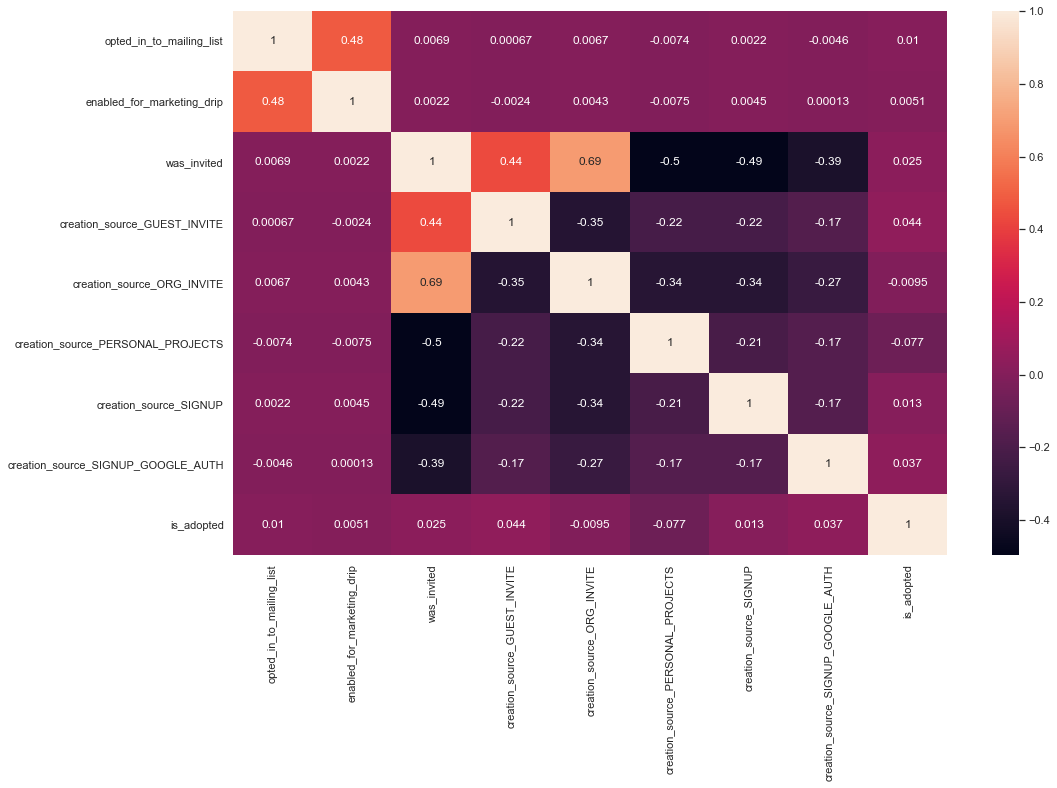

In [28]:
sns.heatmap(df.corr(), annot=True);

In [29]:
df.corr()['is_adopted'].sort_values()

creation_source_PERSONAL_PROJECTS    -0.076690
creation_source_ORG_INVITE           -0.009465
enabled_for_marketing_drip            0.005118
opted_in_to_mailing_list              0.010412
creation_source_SIGNUP                0.012730
was_invited                           0.024877
creation_source_SIGNUP_GOOGLE_AUTH    0.037450
creation_source_GUEST_INVITE          0.044059
is_adopted                            1.000000
Name: is_adopted, dtype: float64

It appears we have a relatively strong negative correlation with `creation_source_PERSONAL_PROJECTS` and relatively strong positive correlations with `creation_source_GUEST_INVITE` and `creation_source_SIGNUP_GOOGLE_AUTH`.

# 2 Modeling - Feature Importance

This is a classification problem. Note that we have a highly imbalanced data set, as one of the classes (`is_adopted` = 1) only accounts for 12% of our data.

Thus, we will use Logistic Regression Classifier and pass it class weights.

In [55]:
# first split the data into 80-20 training and testing
from sklearn.model_selection import train_test_split

X = df.drop(columns=['is_adopted'])
y = df['is_adopted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
# compute class weights
from sklearn.utils.class_weight import compute_class_weight

class_weights_dict = dict(enumerate(compute_class_weight('balanced', np.unique(y_train), y_train)))

In [58]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight=class_weights_dict)

In [59]:
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
acc = accuracy_score(y_test, y_pred)
logloss = log_loss(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
classrpt = classification_report(y_test, y_pred)

In [60]:
print('Logistic Regression Classifier model accuracy = ', acc)
print('Confusion Matrix')
print(cm)
print('Classification Report')
print(classrpt)

Logistic Regression Classifier model accuracy =  0.4675
Confusion Matrix
[[ 946 1157]
 [ 121  176]]
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.45      0.60      2103
           1       0.13      0.59      0.22       297

    accuracy                           0.47      2400
   macro avg       0.51      0.52      0.41      2400
weighted avg       0.79      0.47      0.55      2400



Model accuracy isn't very high at __46.75%__ (note that assigning is_adopted = 0 to all rows would result in a higher model accuracy but would reveal nothing)!

In [61]:
lr.coef_.T

array([[ 0.12942836],
       [-0.01192131],
       [ 0.10867824],
       [ 0.23324626],
       [-0.12456801],
       [-0.64491543],
       [ 0.12927557],
       [ 0.33436186]])

In [63]:
np.array([X.columns]).T

array([['opted_in_to_mailing_list'],
       ['enabled_for_marketing_drip'],
       ['was_invited'],
       ['creation_source_GUEST_INVITE'],
       ['creation_source_ORG_INVITE'],
       ['creation_source_PERSONAL_PROJECTS'],
       ['creation_source_SIGNUP'],
       ['creation_source_SIGNUP_GOOGLE_AUTH']], dtype=object)

In [64]:
feature_importance=pd.DataFrame(np.hstack((np.array([X.columns]).T, lr.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
7,creation_source_SIGNUP_GOOGLE_AUTH,0.334362
3,creation_source_GUEST_INVITE,0.233246
0,opted_in_to_mailing_list,0.129428
6,creation_source_SIGNUP,0.129276
2,was_invited,0.108678
1,enabled_for_marketing_drip,-0.011921
4,creation_source_ORG_INVITE,-0.124568
5,creation_source_PERSONAL_PROJECTS,-0.644915


# 3 Takeaways

We can see from the Logistic Regression model above, the feature importance ties in with the correlations we found earlier.

  * `creation_source` highly affects whether a user becomes an adopted user, specifically:
    * Accounts with a `creation_source` of `PERSONAL_PROJECTS` are highly UNLIKELY to become adopted users.
    * Those with a `creation_source` of `SIGNUP_GOOGLE_AUTH` or `GUEST_INVITE` are much more LIKELY to become adopted users.
  * As such, if the company wants to increase its adopted users, the company may want to make it easier for users to sign up using Google Authentication, as well as encourage existing organizations and their users to invite others to sign up.